##  Milestone 3: Exploratory Data Analysis (EDA)

###  Step 2: Advanced Data Exploration

Once the dataset is loaded and validated, the next step is to perform **advanced exploratory data analysis (EDA)**.  
This phase aims to uncover hidden patterns, detect anomalies, and evaluate the overall quality of the data before proceeding to feature engineering and modeling.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv("dynamic_pricing.csv")
#Advanced EDA
# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Descriptive stats
print("\nDescriptive Stats:\n", df.describe())



Missing Values:
 Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

Number of duplicate rows: 0

Descriptive Stats:
        Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_R

##  Step 3: Outlier Detection and Distribution Analysis

As part of **Milestone 3: Exploratory Data Analysis (EDA)**, it is essential to identify and understand the presence of **outliers** and the overall distribution of features.  
Outliers can significantly distort model training and impact the accuracy of price predictions, especially in a **dynamic pricing** context where data variability is high.

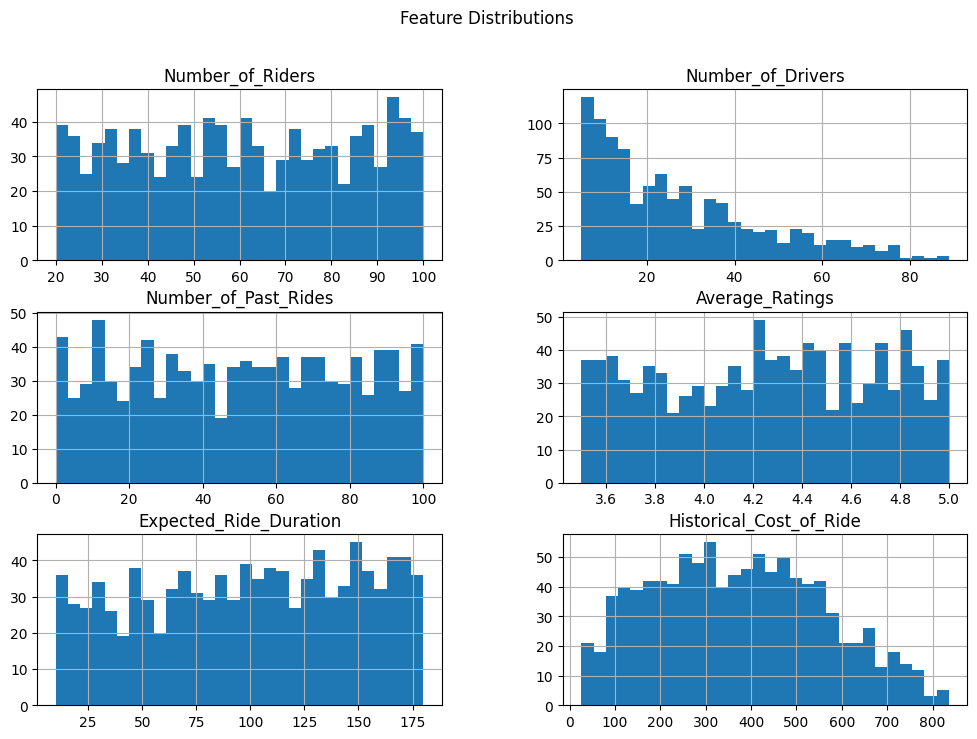

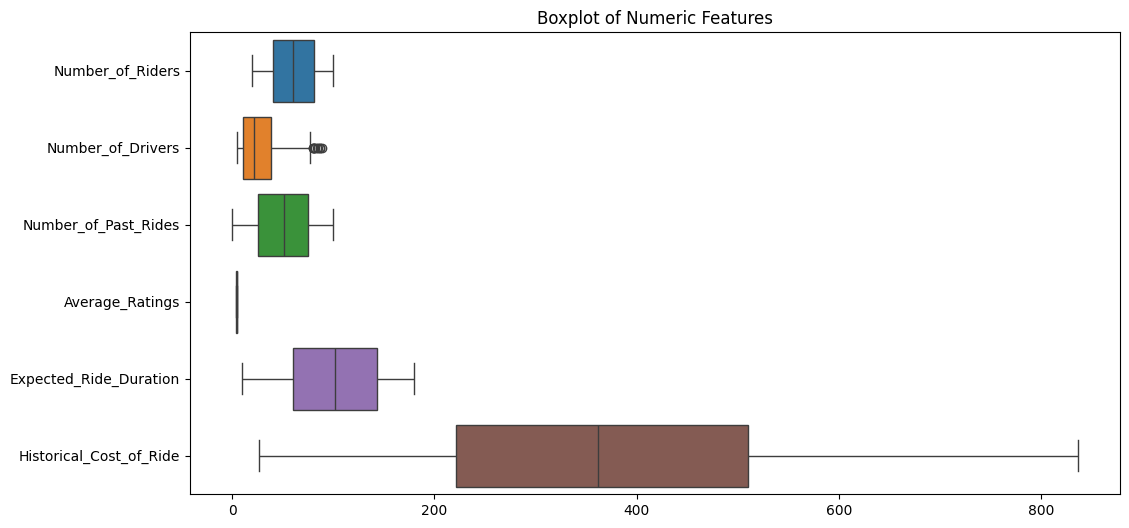


Outliers detected per column:
 4


In [8]:
from scipy.stats import zscore
#Check for outliers with and without boxplot
# Histograms
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number), orient="h")
plt.title("Boxplot of Numeric Features")
plt.show()

# Z-score method for outliers
numeric_df = df.select_dtypes(include=np.number)
z_scores = np.abs(zscore(numeric_df))
outliers = (z_scores > 3).sum()
print("\nOutliers detected per column:\n", outliers)


### Milestone 3: Price Variation by Location Category
#### Objective

To observe how ride costs differ across various location categories.

#### Summary

A boxplot reveals how Urban, Suburban, and Rural locations impact ride pricing.

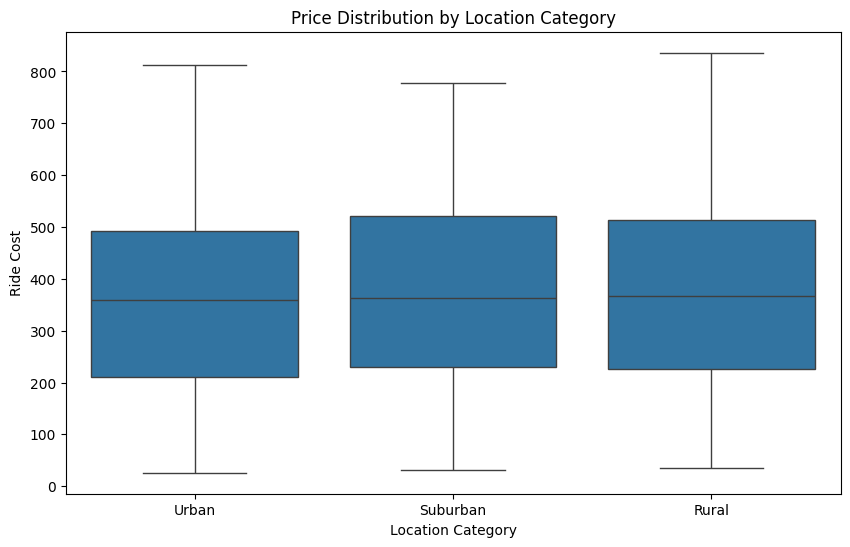

In [9]:
# Price variation by location category
plt.figure(figsize=(10,6))
sns.boxplot(x='Location_Category', y='Historical_Cost_of_Ride', data=df)
plt.title("Price Distribution by Location Category")
plt.xlabel("Location Category")
plt.ylabel("Ride Cost")
plt.show()


##  Step 4: Feature Correlation Analysis

After cleaning and identifying outliers, the next step in **Milestone 3: Exploratory Data Analysis (EDA)** is to examine the **relationships among numerical variables**.  
Understanding these correlations helps identify which features most strongly influence **price fluctuations, sales volume, or inventory levels** — key components in dynamic pricing optimization.

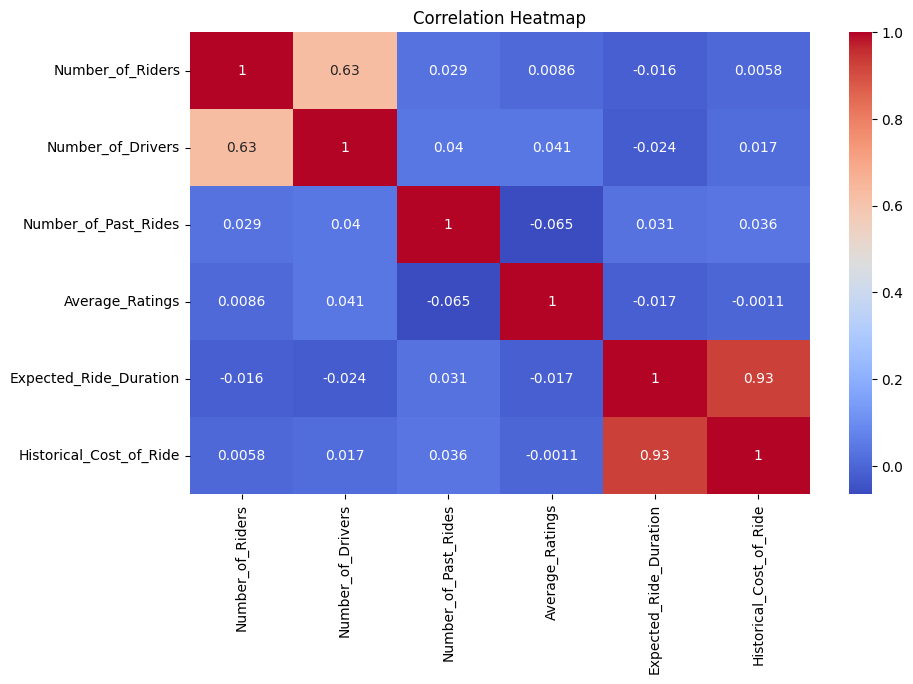

In [10]:
#correlation using heatmap
# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


##  Milestone 3: Exploratory Data Analysis (EDA)

###  Step 5: Linearity Analysis between Features and Target Variable

As part of **Milestone 3: Exploratory Data Analysis (EDA)** in the *AI: PriceOptima* project, this step focuses on assessing the **linearity** between independent features and the **target variable** — `Historical_Cost_of_Ride`.  

Understanding these relationships helps determine which features have the strongest influence on ride cost and guides the selection of the most effective **machine learning models** (linear vs. non-linear).


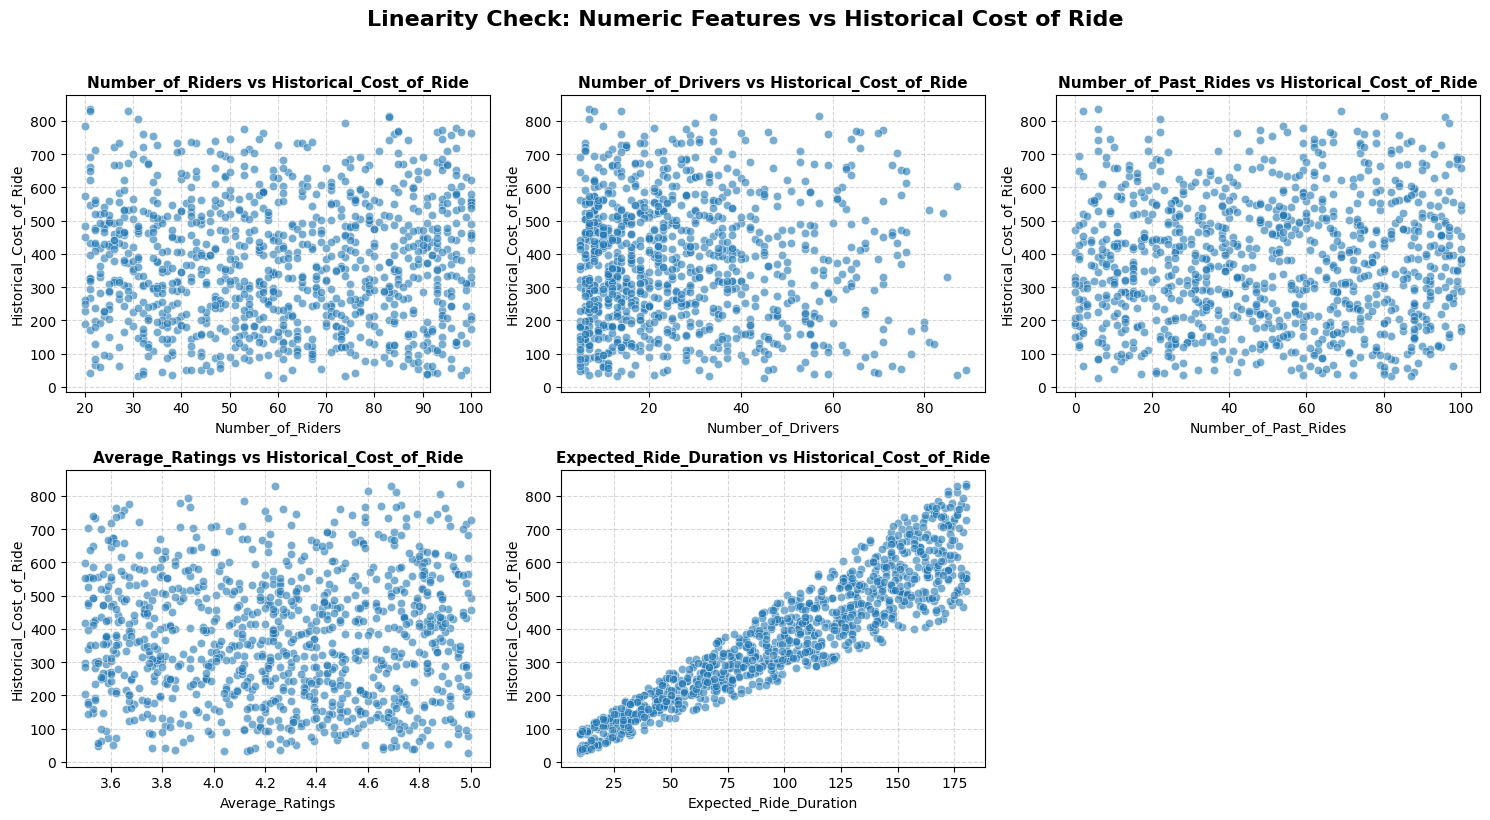

In [11]:
#data linearity using graphs
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset 
df = pd.read_csv("dynamic_pricing.csv")

# Target variable
target = "Historical_Cost_of_Ride"

if target in df.columns:
    numeric_cols = df.select_dtypes(include="number").columns.drop(target)

    
    n_cols = 3  
    n_rows = math.ceil(len(numeric_cols) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.scatterplot(
            data=df,
            x=col,
            y=target,
            alpha=0.6,
            ax=axes[i]
        )
        axes[i].set_title(f"{col} vs {target}", fontsize=11, weight="bold")
        axes[i].grid(True, linestyle="--", alpha=0.5)

    # Remove empty subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # 🔹 Add a main heading for the entire figure
    fig.suptitle("Linearity Check: Numeric Features vs Historical Cost of Ride", 
                 fontsize=16, weight="bold", y=1.02)

    plt.tight_layout()
    plt.show()


##  Milestone 3: EDA & Feature Engineering

###  Step : Label Encoding

Label Encoding converts categorical text data (like Location, Time of Booking, etc.) into numerical values that machine learning models can understand and process.

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("dynamic_pricing.csv")
# Label Encoding 
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_enc = LabelEncoder()

for col in df_encoded.select_dtypes(include="object").columns:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

print("\nAfter Encoding:\n", df_encoded.head())



After Encoding:
    Number_of_Riders  Number_of_Drivers  Location_Category  \
0                90                 45                  2   
1                58                 39                  1   
2                42                 31                  0   
3                89                 28                  0   
4                78                 22                  0   

   Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                        2                    13             4.47   
1                        2                    72             4.06   
2                        2                     0             3.99   
3                        1                    67             4.31   
4                        1                    74             3.77   

   Time_of_Booking  Vehicle_Type  Expected_Ride_Duration  \
0                3             1                      90   
1                1             0                      43   
2                0  

Milestone 3: Exploratory Data Analysis (EDA)
##### Step 4: Correlation Analysis between Numerical Features
This step helps prepare the dataset for *** Milestone 5 (Model Development) *** by identifying the most predictive features and ensuring that redundant or collinear variables are handled appropriately.

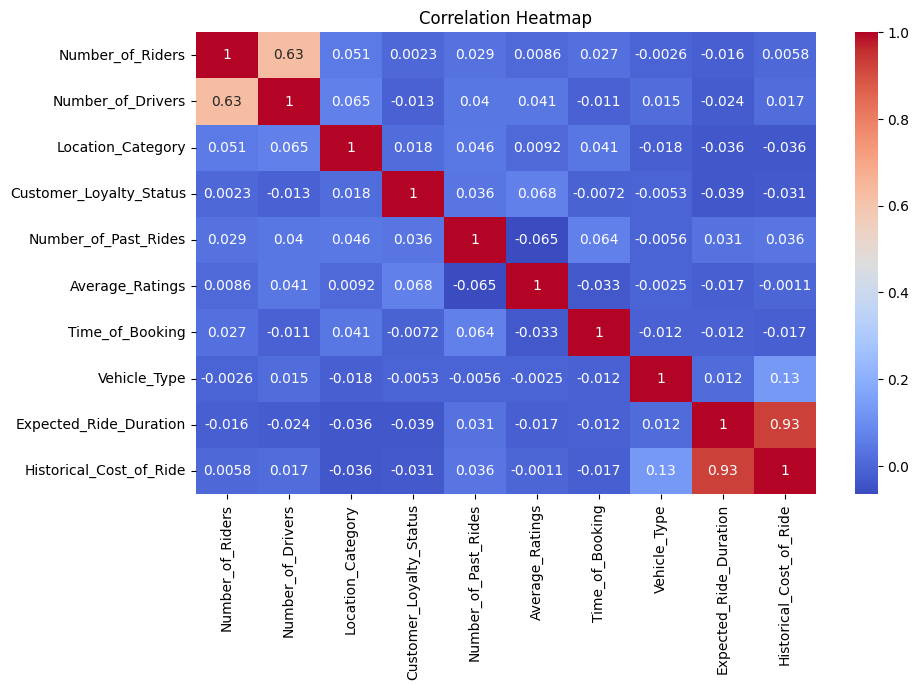

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
# Load your dataset 
df = pd.read_csv("cleaned_csv_data.csv")
df_encoded = df.copy()
#.Correlations
numeric_df = df_encoded.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Milestone 3: Exploratory Data Analysis (EDA)
##### Step 4: Correlation Analysis between Numerical Features
This step helps prepare the dataset for *** Milestone 5 (Model Development) *** by identifying the most predictive features and ensuring that redundant or collinear variables are handled appropriately.

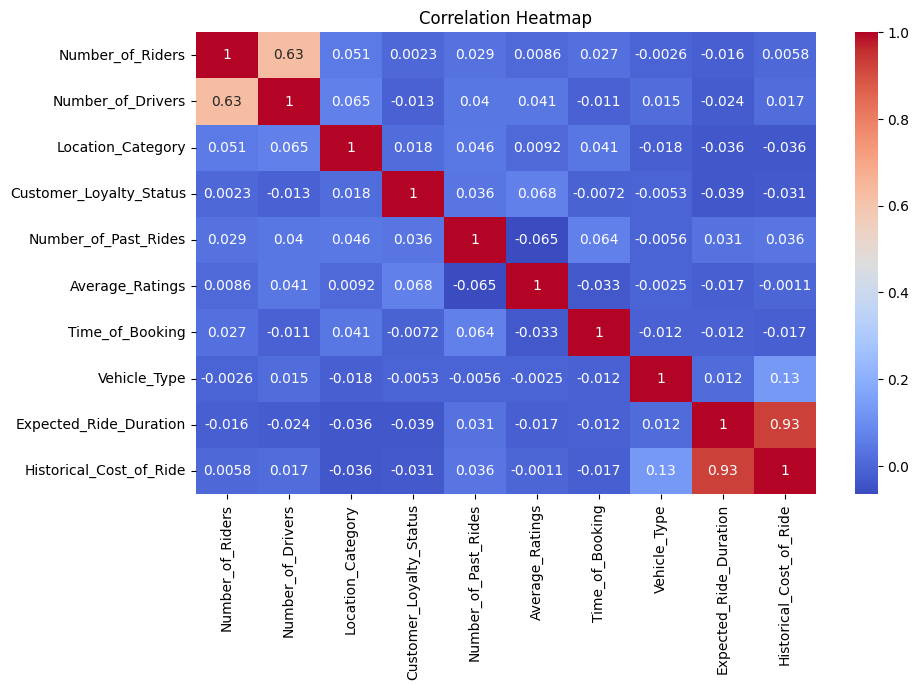

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
# Load your dataset 
df = pd.read_csv("cleaned_csv_data.csv")
df_encoded = df.copy()
#.Correlations
numeric_df = df_encoded.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Milestone 3: Exploratory Data Analysis (EDA)
#### Step 3: Relationship Analysis — Ride Duration vs. Ride Cost

 this step examines the relationship between ride duration and ride cost to understand how pricing scales with travel time.
 #### Objective

To visualize and interpret the correlation between Expected Ride Duration and Historical Cost of Ride, identifying whether the relationship is linear, exponential, or variable based on duration trends.

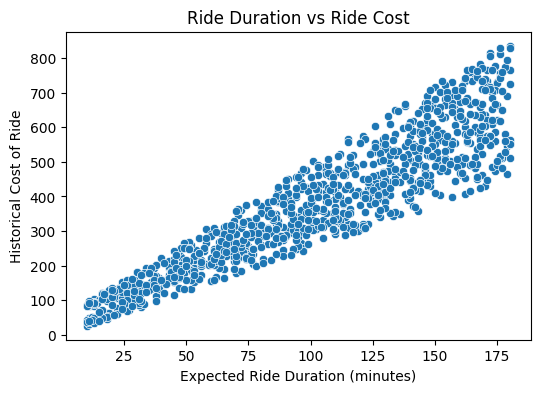

In [6]:
#Price vs Ride Duration
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["Expected_Ride_Duration"], y=df["Historical_Cost_of_Ride"])
plt.title("Ride Duration vs Ride Cost")
plt.xlabel("Expected Ride Duration (minutes)")
plt.ylabel("Historical Cost of Ride")
plt.show()


KPIs (Key Performance Indicators)

KPIs are metrics that help measure business performance.
For this dataset, possible KPIs could be:

Average Ride Cost → profitability measure

Average Ride Duration → efficiency

Customer Loyalty Distribution → retention metric

Driver to Rider Ratio → supply-demand balance

Average Customer Rating → service quality

### Milestone 3: Exploratory Data Analysis (EDA)
#### Step 2: KPI Metrics Calculation

Key performance indicators (KPIs) are calculated to gain a quick understanding of the dataset and overall business metrics.
These metrics provide insights into ride costs, duration trends, customer satisfaction, and platform efficiency.

In [12]:
#KPI metrics
print("\nKPI Examples:")
print("Average Ride Cost:", df["Historical_Cost_of_Ride"].mean())
print("Average Ride Duration:", df["Expected_Ride_Duration"].mean())
print("Average Rating:", df["Average_Ratings"].mean())
print("Customer Loyalty Distribution:\n", df["Customer_Loyalty_Status"].value_counts())
print("Driver-to-Rider Ratio (mean):", (df["Number_of_Drivers"]/df["Number_of_Riders"]).mean())



KPI Examples:
Average Ride Cost: 372.5026233496332
Average Ride Duration: 99.588
Average Rating: 4.25722
Customer Loyalty Distribution:
 Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64
Driver-to-Rider Ratio (mean): 0.43816175626549936


### Milestone 3: Exploratory Data Analysis (EDA)
#### Step 2: Segmentations (Groupby Analysis)

After encoding and preparing the dataset, segmentation helps uncover patterns in customer behavior and pricing trends.
By grouping data across categorical dimensions such as Customer Loyalty Status and Location Category, we can identify how pricing varies across customer segments — a crucial step for building the dynamic pricing model.

In [13]:
#Segmentations (Groupby)
# Average Ride Cost by Customer Loyalty
print("\nAverage Ride Cost by Customer Loyalty Status:")
print(df.groupby("Customer_Loyalty_Status")["Historical_Cost_of_Ride"].mean())

# Average Ride Cost by Location
print("\nAverage Ride Cost by Location Category:")
print(df.groupby("Location_Category")["Historical_Cost_of_Ride"].mean())



Average Ride Cost by Customer Loyalty Status:
Customer_Loyalty_Status
Gold       376.118746
Regular    380.125251
Silver     362.772140
Name: Historical_Cost_of_Ride, dtype: float64

Average Ride Cost by Location Category:
Location_Category
Rural       379.942172
Suburban    374.319486
Urban       363.673259
Name: Historical_Cost_of_Ride, dtype: float64


### Milestone 3: Exploratory Data Analysis (EDA)
#### Step 3: Scatter Plot — Riders vs. Price Relationship

To understand the relationship between demand (Number of Riders) and pricing (Historical Ride Cost), we visualize the data using a scatter plot with a regression trend line.
This analysis helps determine whether higher demand correlates with higher prices — a key insight for dynamic pricing strategies.

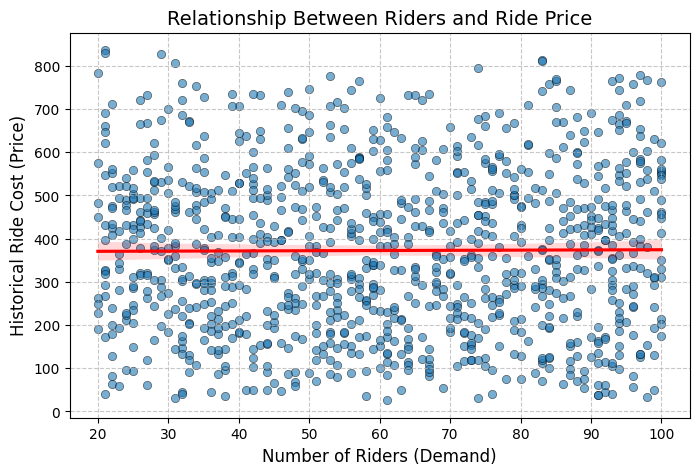

In [14]:
#scatter plot (Riders vs. Price)
plt.figure(figsize=(8, 5))

# Scatter points with transparency
sns.scatterplot(x=df["Number_of_Riders"], 
                y=df["Historical_Cost_of_Ride"], 
                alpha=0.6, edgecolor="k")

# Add regression line to show trend
sns.regplot(x=df["Number_of_Riders"], 
            y=df["Historical_Cost_of_Ride"], 
            scatter=False, color="red")

plt.title("Relationship Between Riders and Ride Price", fontsize=14)
plt.xlabel("Number of Riders (Demand)", fontsize=12)
plt.ylabel("Historical Ride Cost (Price)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


### Milestone 3: Exploratory Data Analysis (EDA)
#### Step 4: Boxplot — Ride Cost Distribution by Location

Understanding how ride prices vary across different location categories (urban, suburban, rural) helps identify geographic pricing trends and market segmentation.
This visualization provides insights into price dispersion, outliers, and regional pricing behavior, supporting better feature selection and pricing strategy refinement for the dynamic pricing model.

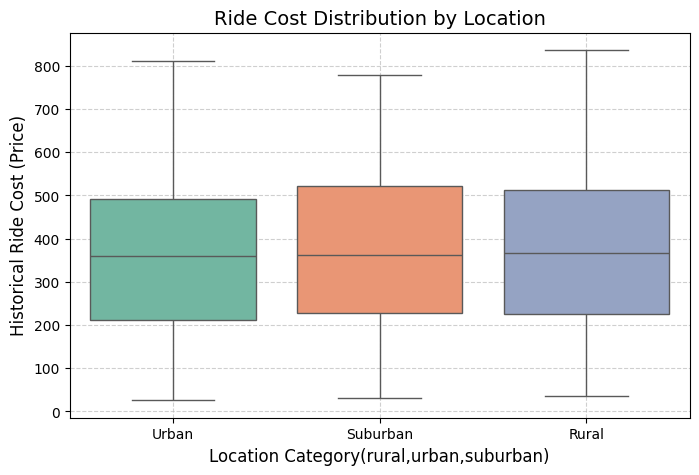

In [15]:
# Boxplot by Location
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="Location_Category",
    y="Historical_Cost_of_Ride",
    hue="Location_Category",
    data=df,
    palette="Set2",
    legend=False
)
plt.title("Ride Cost Distribution by Location", fontsize=14)
plt.xlabel("Location Category(rural,urban,suburban)", fontsize=12)
plt.ylabel("Historical Ride Cost (Price)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [ ]:
### Milestone 3: Exploratory Data Analysis (EDA)
#### Step 5: Pie Chart — Total Ride Cost by Customer Loyalty Status

Customer loyalty segmentation provides critical insights into revenue contribution from different loyalty tiers.
By visualizing total ride cost proportions for Gold, Silver, and Regular customers, we can identify which segment drives the majority of revenue and assess opportunities for targeted pricing strategies.

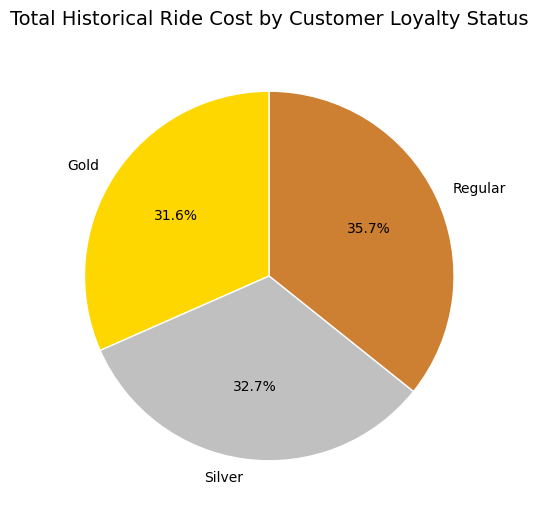

In [16]:
# Group total ride cost by loyalty status
loyalty_segmentation = df.groupby("Customer_Loyalty_Status")["Historical_Cost_of_Ride"].sum()

# Define colors for each loyalty tier
colors = ["#FFD700", "#C0C0C0", "#CD7F32"]  # Gold, Silver, Bronze (Regular)

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    loyalty_segmentation,
    labels=["Gold", "Silver", "Regular"],   # Ensure proper order & names
    autopct="%1.1f%%",                      # Show % values
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white"}       # clean separation
)
plt.title("Total Historical Ride Cost by Customer Loyalty Status", fontsize=14, pad=15)
plt.show()


### Milestone 3: Exploratory Data Analysis (EDA)
#### Step 6: Customer Segmentation Summary (Descriptive Statistics)

To gain a deeper understanding of how different customer loyalty tiers behave in terms of ride spending, we perform a descriptive statistical analysis.
This step summarizes key metrics such as mean, standard deviation, minimum, and maximum ride cost for each loyalty segment, providing insights into customer value and variability in spending patterns.

In [17]:
# Grouping the data by Customer Loyalty Status
loyalty_segmentation = df.groupby("Customer_Loyalty_Status")["Historical_Cost_of_Ride"].describe()

print("Customer Segmentation Summary:")
display(loyalty_segmentation)


Customer Segmentation Summary:


,count,mean,std,min,25%,50%,75%,max
Customer_Loyalty_Status,,,,,,,,
Gold,313.0,376.118746,184.967070,31.565676,233.506624,373.975636,512.449393,828.213135
Regular,320.0,380.125251,189.611633,34.574093,220.372179,358.951011,520.301477,836.116419
Silver,367.0,362.772140,186.956263,25.993449,215.308300,348.669562,503.742632,814.419556


### Milestone 3: Exploratory Data Analysis (EDA)
#### Step 7: Customer Segmentation — Price Variation by Loyalty & Seasonality

To understand how ride pricing varies across customer loyalty tiers and temporal factors, we perform a grouped analysis.
This step combines Customer Loyalty Status with Season or Time of Day, revealing patterns that can guide dynamic pricing strategies and targeted promotions.

['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

Customer Segmentation — Price Variation by Loyalty & Seasonality:

  Customer_Loyalty_Status  Avg_Ride_Cost  Total_Rides        min         max
0                    Gold     376.118746          313  31.565676  828.213135
1                 Regular     380.125251          320  34.574093  836.116419
2                  Silver     362.772140          367  25.993449  814.419556


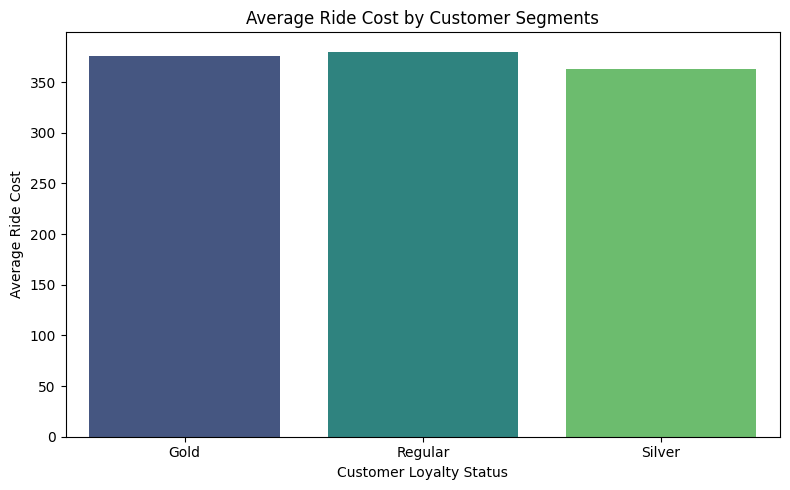

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

# Check available columns
print(df.columns.tolist())

# Determine grouping columns
group_columns = []
if "Customer_Loyalty_Status" in df.columns:
    group_columns.append("Customer_Loyalty_Status")
if "Season" in df.columns:
    group_columns.append("Season")
elif "Time_of_Day" in df.columns:
    group_columns.append("Time_of_Day")

# Perform segmentation
segmentation = (
    df.groupby(group_columns)["Historical_Cost_of_Ride"]
      .agg(["mean", "count", "min", "max"])
      .reset_index()
      .rename(columns={"mean": "Avg_Ride_Cost", "count": "Total_Rides"})
)

print("\nCustomer Segmentation — Price Variation by Loyalty & Seasonality:\n")
print(segmentation.head())

# Visualization
plt.figure(figsize=(8, 5))

if len(group_columns) > 1:
    # Two grouping variables — grouped barplot
    sns.barplot(
        data=segmentation,
        x=group_columns[0],
        y="Avg_Ride_Cost",
        hue=group_columns[-1],
        palette="viridis"
    )
    plt.legend(title=group_columns[-1])
else:
    # One grouping variable — assign palette properly as hue=x
    sns.barplot(
        data=segmentation,
        x=group_columns[0],
        y="Avg_Ride_Cost",
        hue=group_columns[0],  # use hue same as x to apply palette safely
        palette="viridis",
        legend=False
    )

plt.title("Average Ride Cost by Customer Segments")
plt.xlabel(group_columns[0].replace("_", " "))
plt.ylabel("Average Ride Cost")
plt.tight_layout()
plt.show()


Milestone 3: Exploratory Data Analysis (EDA)
##### Step: Customer Segmentation and Seasonal Pricing Analysis

To segment customers and analyze ride pricing behavior across different loyalty levels and seasonal or temporal factors, helping identify high-value customer groups and demand trends.

Available Columns:
 ['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

✅ Customer Segmentation Summary:

  Customer_Loyalty_Status Location_Category  Avg_Ride_Cost  Total_Rides  \
0                    Gold             Rural     377.956038          112   
1                    Gold          Suburban     378.212327           92   
2                    Gold             Urban     372.463828          109   
3                 Regular             Rural     380.477289          103   
4                 Regular          Suburban     361.108287          107   

         min         max  
0  45.917112  828.213135  
1  31.565676  766.919324  
2  38.235235  775.791685  
3  55.637371  836.116419  
4  34.574093  778.633356  


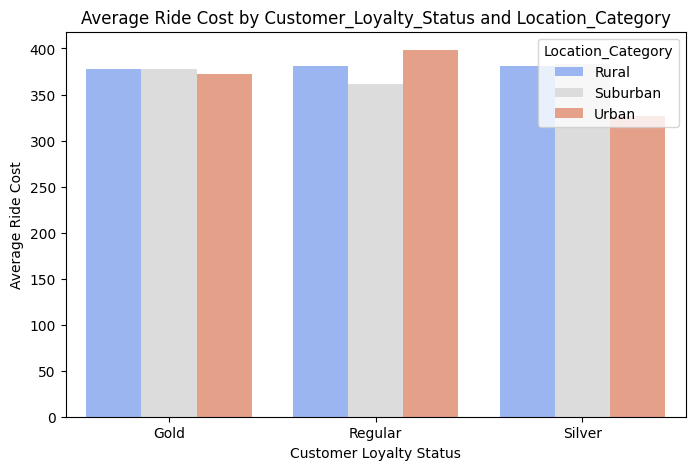

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

# Check available columns
print("Available Columns:\n", df.columns.tolist())

# --- Step 1: Choose available grouping columns ---
# Use loyalty and season/time/location if available
group_cols = []

if "Customer_Loyalty_Status" in df.columns:
    group_cols.append("Customer_Loyalty_Status")

# Choose one feature for seasonality grouping
if "Season" in df.columns:
    group_cols.append("Season")
elif "Time_of_Day" in df.columns:
    group_cols.append("Time_of_Day")
elif "Month" in df.columns:
    group_cols.append("Month")
elif "Location_Category" in df.columns:
    group_cols.append("Location_Category")

# Safety check
if len(group_cols) < 2:
    print("\n⚠️ Not enough columns for segmentation — showing grouping by 1 column only.")
    
# --- Step 2: Group & summarize ride cost ---
segmentation = (
    df.groupby(group_cols)["Historical_Cost_of_Ride"]
      .agg(["mean", "count", "min", "max"])
      .reset_index()
      .rename(columns={"mean": "Avg_Ride_Cost", "count": "Total_Rides"})
)

print("\n✅ Customer Segmentation Summary:\n")
print(segmentation.head())

# --- Step 3: Visualization ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=segmentation,
    x=group_cols[0],
    y="Avg_Ride_Cost",
    hue=group_cols[-1],
    palette="coolwarm"
)
plt.title(f"Average Ride Cost by {group_cols[0]} and {group_cols[-1]}")
plt.xlabel(group_cols[0].replace("_", " "))
plt.ylabel("Average Ride Cost")
plt.legend(title=group_cols[-1])
plt.show()


Milestone 3: KPI Evaluation — Dynamic Pricing Performance
##### Step 1: KPI Calculation (Revenue Lift, Profit Margin, Conversion Rate)
##### Objective

To evaluate the financial performance of the dynamic pricing model by tracking key business metrics — Revenue Lift, Profit Margin, and Conversion Rate.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
#KPIs for Revenue lift, Profit Margin, Conversion Rate, reflecting the outcome of the dynamic pricing model 
# Load cleaned data
df = pd.read_csv("cleaned_csv_data.csv")

# ✅ Ensure key column exists
if "Historical_Cost_of_Ride" in df.columns:

    # 1 Revenue (using historical cost as proxy for ride price)
    df["revenue"] = df["Historical_Cost_of_Ride"]

    # 2 Profit and Profit Margin (assuming 30% profit)
    df["profit"] = df["revenue"] * 0.3
    df["profit_margin"] = (df["profit"] / df["revenue"]) * 100

    # 3 Conversion Rate (simulate if not available)
    if "Booking_Confirmed" not in df.columns:
        np.random.seed(42)
        df["Booking_Confirmed"] = np.random.choice([0, 1], size=len(df))
    df["conversion_rate"] = (df["Booking_Confirmed"].rolling(50, min_periods=1).mean()) * 100  # rolling avg for smoother trend

    # 4 Revenue Lift (% change compared to average baseline)
    base_revenue = df["revenue"].mean()
    df["revenue_lift_pct"] = ((df["revenue"] - base_revenue) / base_revenue) * 100

    # 📊 Summary Metrics
    avg_revenue_lift = df["revenue_lift_pct"].mean()
    avg_profit_margin = df["profit_margin"].mean()
    overall_conversion_rate = (df["Booking_Confirmed"].sum() / len(df)) * 100

    print("\n========= KPI Summary =========")
    print(f"📊 Average Revenue Lift: {avg_revenue_lift:.2f}%")
    print(f"💰 Average Profit Margin: {avg_profit_margin:.2f}%")
    print(f"✅ Conversion Rate: {overall_conversion_rate:.2f}%")
    print("================================\n")

    # Show sample KPI table
    kpi_summary = df[["revenue", "profit_margin", "conversion_rate", "revenue_lift_pct"]]
    print(kpi_summary.head())

else:
    print("❌ Column 'Historical_Cost_of_Ride' not found in dataset.")



========= KPI Summary =========
📊 Average Revenue Lift: -0.00%
💰 Average Profit Margin: 30.00%
✅ Conversion Rate: 51.00%

      revenue  profit_margin  conversion_rate  revenue_lift_pct
0  284.257273           30.0         0.000000        -23.689860
1  173.874753           30.0        50.000000        -53.322543
2  329.795469           30.0        33.333333        -11.464927
3  470.201232           30.0        25.000000         26.227630
4  579.681422           30.0        20.000000         55.618078


In [6]:
import json

path = "Exploratory Data Analysis (EDA).ipynb"

with open(path, "r", encoding="utf-8") as f:
    content = f.read()

# Try to detect and fix common issues
try:
    json.loads(content)
    print("✅ File is valid JSON.")
except json.JSONDecodeError as e:
    print("❌ JSON error:", e)
    # Attempt quick repair (trims partial saves)
    fixed = content.rsplit('}', 1)[0] + '}'
    with open("repaired_notebook.ipynb", "w", encoding="utf-8") as f:
        f.write(fixed)
    print("🩹 Wrote repaired_notebook.ipynb")


❌ JSON error: Expecting value: line 1 column 1 (char 0)
🩹 Wrote repaired_notebook.ipynb
